In [1]:
library(tidyverse)
player<-read_csv("https://raw.githubusercontent.com/alicewj110/minecraft_pj/refs/heads/main/players.csv")
session<-read_csv("https://raw.githubusercontent.com/alicewj110/minecraft_pj/refs/heads/main/sessions.csv")
head(player)
head(session)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### **1. Data Description**

**player.csv:**

- player-specific information
- 7 columns
- 195 observations
  
   Variables:
1. hashedEmail (character)
   - the email/username of each person
   
2. experience (character)
   - Classification of the player type by experience
   - ordered: Beginner, Amateur, Regular, Pro, Veteran

3. subscribe (logical)
   - whether they are subscribed for newsletters or not

4. Name (character)
   - Name of each person participating

5. played_hours (double precision)
   - The total time the player has spent in the game (in hours)

6. gender (character)
   - The gender of the people participating

7. Age (double precision)
   - The age of each person participating

**sessions.csv:**

- information on each session
- 5 columns
- 1534 observations

    Variables:
   
1. hashedEmail (character)

   - the email/username of each person

2. start_time (double precision)

   - Time when a player starts a session

3. end_time (double precision)

   - Time when a player ends a session

4. original_start_time (double precision)

   - milliseconds after Jan. 1, 1970
   - Unix epoch time until player started session

5. original_end_time (double precision)

   - milliseconds after Jan. 1, 1970
   - Unix epoch time until player ended the session


Data Collection:
- the data is from the server logs
Issues:
- There can be missing timestamps 
- there can be duplicate entries
- not all data in the Age column are numeric, which leads to difficulty in wrangling and bias
- not all data in the gender column are explicitly stated (some prefer not to say), which leads to bias

|   |Age|Played Hours|
|---|---|-------------|
|mean|20.52062|5.845918|
|max|50|223.1|
|min|8|0|

### **2. Questions:**

   Chosen broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

   Specific Question: Can the variables Age and played_hours work accurately to predict whether a person is or isn't subscribed to game related newsletters in the game dataset?

Wrangling data:

- remove all the NAs from Age
- change relevant variable (subscribe) into factors

### **3. Exploratory Data Analysis and Visualization**

In [3]:

tidy_sessions<-session|>
    separate(col=start_time, into=c("start_date", "start_time"), sep="\ ") |>
    separate(col=end_time, into=c("end_date", "end_time"), sep="\ ") |> 
    separate(col=start_time, into=c("start_hour", "start_minute"), sep=":") |>
    separate(col=end_time, into=c("end_hour", "end_minute"), sep=":")|>
    separate(col=start_date, into=c("start_day", "start_month", "start_year"), sep="/") |>
    separate(col=end_date, into=c("end_day", "end_month", "end_year"), sep="/")
head(tidy_sessions)

#all mean values in the player.csv dataset

player_mean<-player|>
    select(played_hours, Age)|>
    map_df(mean, na.rm=TRUE)
player_mean
player_max<-player|>
    select(played_hours, Age)|>
    map_df(max, na.rm=TRUE)

player_min<-player|>
    select(played_hours, Age)|>
    map_df(min, na.rm=TRUE)


hashedEmail,start_day,start_month,start_year,start_hour,start_minute,end_day,end_month,end_year,end_hour,end_minute,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30,06,2024,18,12,30,06,2024,18,24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17,06,2024,23,33,17,06,2024,23,46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25,07,2024,17,34,25,07,2024,17,57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25,07,2024,03,22,25,07,2024,03,58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25,05,2024,16,01,25,05,2024,16,12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23,06,2024,15,08,23,06,2024,17,10,1.71916e+12,1.71916e+12


played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


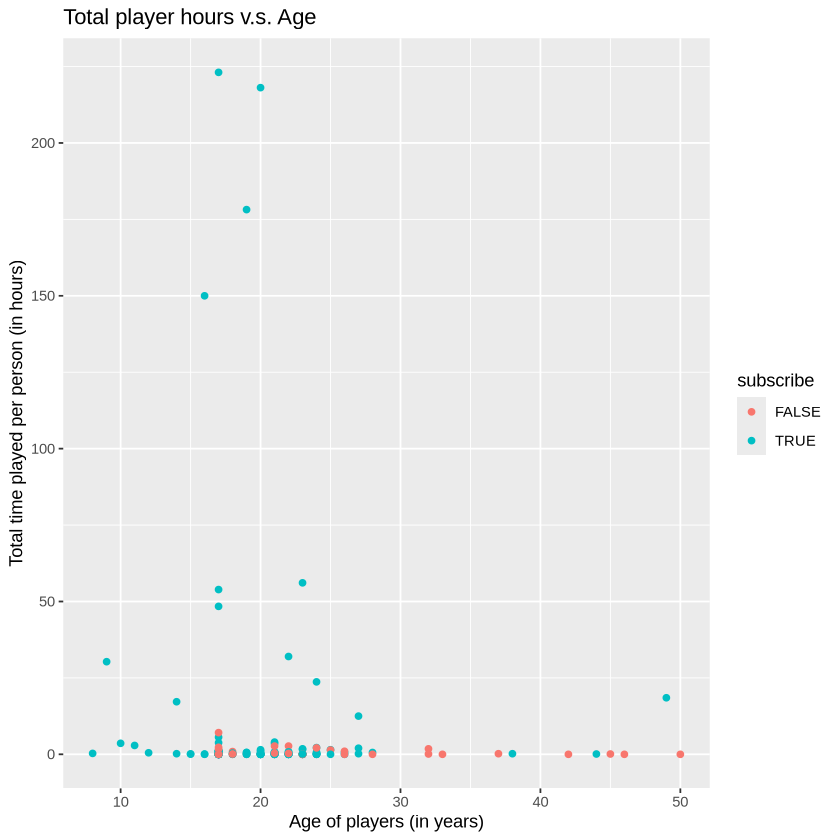

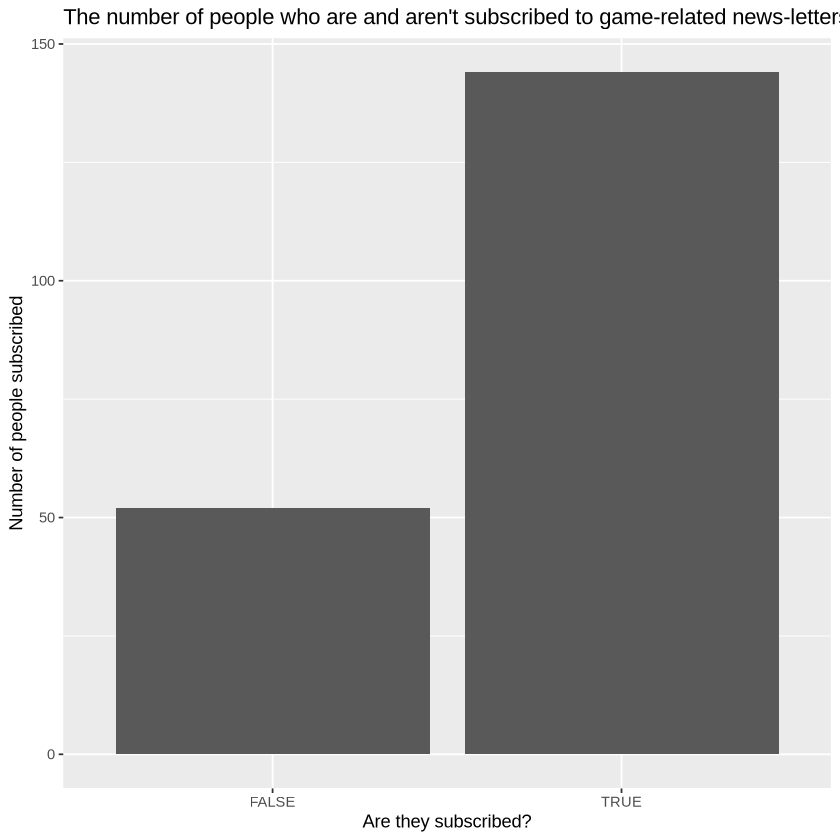

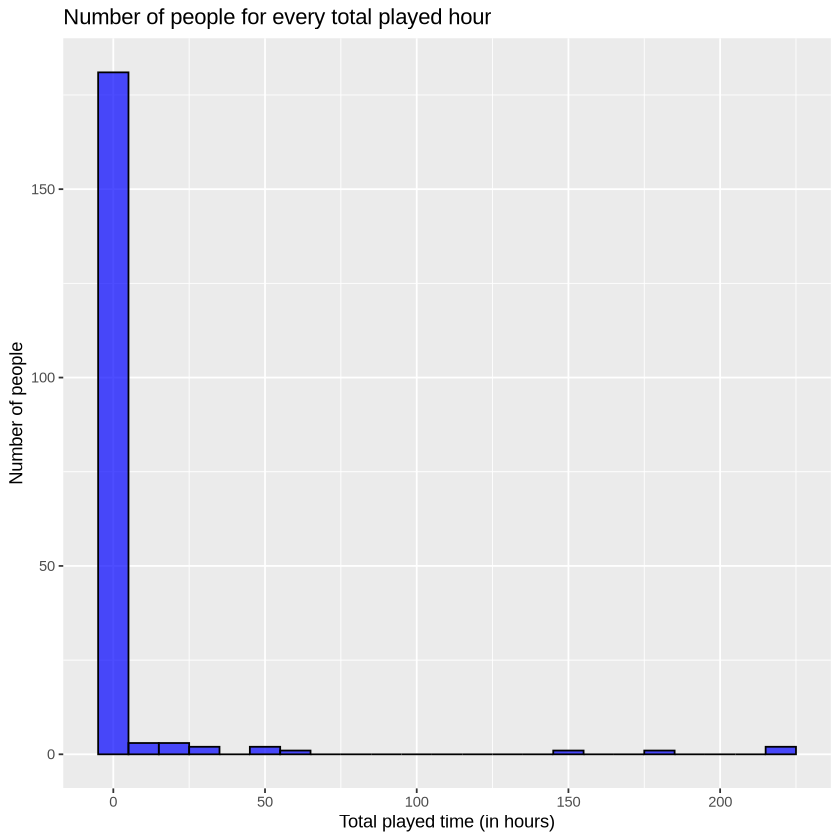

In [4]:
game_plot<-ggplot(player, aes(x=Age, y=played_hours, color=subscribe))+
    geom_point()+
    labs(x="Age of players (in years)", y="Total time played per person (in hours)", title="Total player hours v.s. Age")
game_plot

subscribe_plot<-player|>
    ggplot(aes(x=subscribe))+
    geom_bar()+
    labs(x="Are they subscribed?", y="Number of people subscribed", title="The number of people who are and aren't subscribed to game-related news-letters")
subscribe_plot

time_plot<-ggplot(player, aes(x=played_hours))+
    geom_histogram(binwidth=10, fill="blue", alpha=0.7, color="black")+
    labs(x="Total played time (in hours)", y="Number of people", title="Number of people for every total played hour")
time_plot

From the first plot, we can tell that there is no correlation between the played hours and the age, but the colors show us that the people with more hours likely are subscribed to newsletters. 
The second plot shows us that there are almost triple the number of people subscribed than there are unsubscribed. However, this can be biased since people that sign up for such things may be more likely to partake in such studies. 
The third plot shows the distribution of all the total played hours. It shows that most of the people in the study played 0 hours.

### **4. Methods**

k-NN classification 
   - split player.csv into 75%-training and 25%-testing
   - use Age and played hours (and scale them) to predict subscribe
   - Perform 5-fold cross-validation on the training set to find most accurate k
   - use the testing set to find rsmpe of selected k

Why k-NN classification?
- predicting a categorical variable
- no assumption of data distribution or shape
- dataset not too large

Assumptions:
- all variables are standardized
    - makes sure each plot has same influence when predicting
- the variables used to predict are meaningful variables for predicting

Issues:
- plots not evenly spaced out
    - concentrated at the bottom
    - no plots present at top left
- non-subscribed number of people lower than subscribed people
    - one may be favoured over the other
- Age and played_hours may be weak predictors
  